Giá trị F1 (trung bình thời gian tàu ở cảng): 54269.77882041931
Giá trị F2 (trung bình tổng quãng đường vận chuyển container do lệch bến): 576.9845
Giá trị F3 (tổng chi phí chờ và trễ): 312010.0016593933
F = 9535.566190934616
Iter 1: Best Fitness = 174.2798
Iter 6: Best Fitness = 172.4874
Iter 11: Best Fitness = 172.4874
Iter 16: Best Fitness = 171.9791
Iter 21: Best Fitness = 171.9791
Iter 26: Best Fitness = 171.9791
Iter 31: Best Fitness = 171.9791
Iter 36: Best Fitness = 170.0709
Iter 41: Best Fitness = 170.0709
Iter 46: Best Fitness = 170.0709
Iter 51: Best Fitness = 170.0709
Iter 56: Best Fitness = 170.0709
Iter 61: Best Fitness = 170.0709
Iter 66: Best Fitness = 170.0709
Iter 71: Best Fitness = 170.0709
Iter 76: Best Fitness = 170.0709
Iter 81: Best Fitness = 170.0709
Iter 86: Best Fitness = 170.0709
Iter 91: Best Fitness = 170.0709
Iter 96: Best Fitness = 170.0709
Iter 100: Best Fitness = 170.0709

Optimization completed in 77.36 seconds
Best solution found with fitness: 170.070

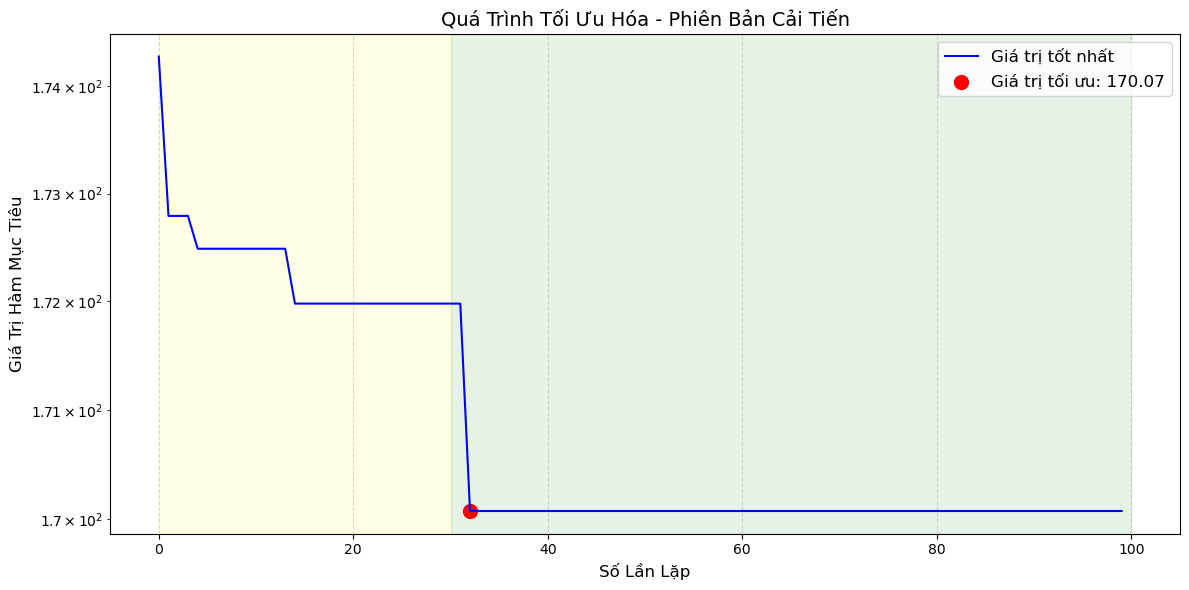

C:\Users\minhv\AppData\Local\Temp\ipykernel_17528\4155005389.py:908: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\minhv\anaconda3\envs\pytorch-env\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


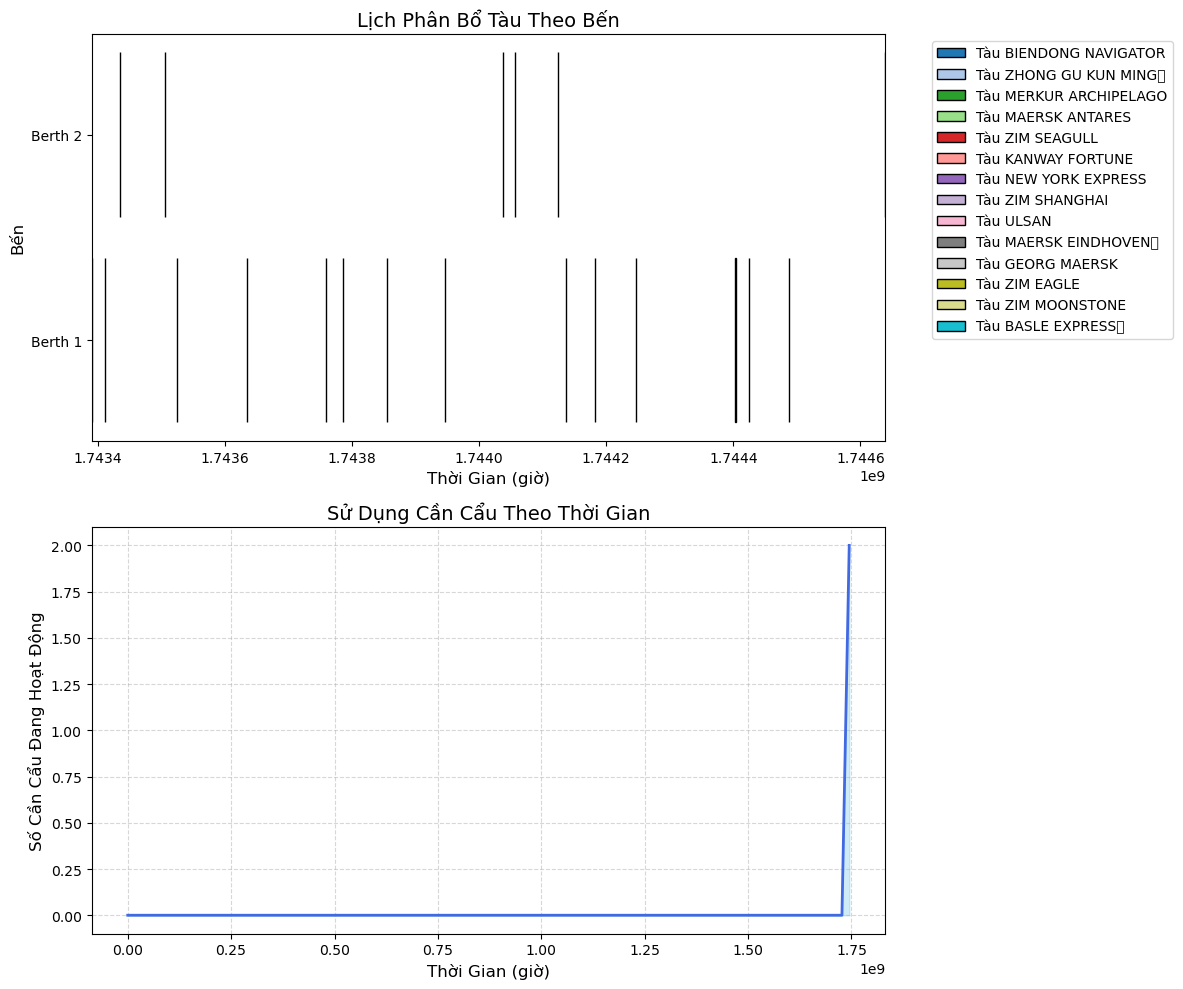

In [4]:
import time
import numpy as np
from datetime import datetime, timedelta
import math
from copy import deepcopy
from scipy.stats import norm
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime


InputVariables = pd.read_excel(r'E:\KLTN_DU\Source\Data\Data for Coding.xlsx', sheet_name='Input Variables')
VS = pd.read_excel(r'E:\KLTN_DU\Source\Data\Data for Coding.xlsx', sheet_name='Vessel Schedule')
ChannelBerth = pd.read_excel(r'E:\KLTN_DU\Source\Data\Data for Coding.xlsx', sheet_name='Channel-Berth')
Tidal = pd.read_excel(r'E:\KLTN_DU\Source\Data\Data for Coding.xlsx', sheet_name='Tidal')
VesselSchedule = VS[:20]
LengthSave = pd.read_excel(r'E:\KLTN_DU\Source\Data\Data for Coding.xlsx', sheet_name='Khoảng cách an toàn')
channel_tide = pd.read_excel(r'E:\KLTN_DUU\Source\Data\Data for Coding.xlsx', sheet_name='Channel Tide')
berth_tide = pd.read_excel(r'E:\KLTN_DUU\Source\Data\Data for Coding.xlsx', sheet_name='Berth Tide')
LSd = LengthSave['Khoảng cách d giữa các tàu (m)'].tolist()
LSe = LengthSave['Khoảng cách e giữa tàu và điểm cuối đoạn thẳng tuyến bến (m)'].tolist()

TG0 = InputVariables.iloc[0, 2] #Thời gian cố định để tàu di chuyển qua kênh
W = InputVariables.iloc[1, 2] #Độ dài mỗi khung thời gian thủy triều cao/thấp
R = InputVariables.iloc[2, 2] #Một số nguyên đủ lớn để ràng buộc
M = InputVariables.iloc[3, 2] #Tổng số xe tải có thể sử dụng
CE0 = float(InputVariables.iloc[4, 2]) #thời gian để 1 cần cẩu bốc dỡ 1 container (giờ)
CF0 = float(InputVariables.iloc[5, 2]) #thời gian để 1 cần cẩu bốc dỡ 1 container (giờ)
vh = np.random.normal(loc=25, scale=4) #Tốc độ xe tải khi không tải
vl = np.random.normal(loc=18, scale=3) #Tốc độ khi xe container quá tải
n_ = InputVariables.iloc[9, 2] #Mức tiêu thụ nhiên liệu khi chạy không tải
E1 = float(InputVariables.iloc[10, 2]) #Hệ số phát thải carbon của xe tải
E2 = InputVariables.iloc[11, 2] #Hệ số chuyển đổi điện năng sang khí thải carbon
lambda1 = InputVariables.iloc[12, 2] #Mức tiêu thụ năng lượng khi cần cẩu làm việc
lambda2 = InputVariables.iloc[13, 2] #Mức tiêu thụ năng lượng khi cần cẩu di chuyển giữa các vị trí
Channel = InputVariables.iloc[14, 2] #Kênh
V = VesselSchedule['Vessel Name'].tolist() #Vessel
TAi = VesselSchedule['TOi (Estimated Time of Arrival)'].tolist() # Thời gian dự kiến tàu đến
TFi = VesselSchedule['TFi (Estimated Time of departure)'].tolist() # Thời gian dự kiến tàu đi
TWi = VesselSchedule['TWi (Maximum waiting time, hour)'].tolist() # Thời gian chờ tối đa của tàu
VLi = VesselSchedule['VLi (Length, m)'].tolist() #VLi (Chiều dài tàu i) (mét)
VDi = VesselSchedule['VDi (Draft, m)'].tolist() #VDi (Mớn nước của tàu i) (mét)
VEi = VesselSchedule['VEi (Total container)'].tolist() #VEi (Số lượng container tàu chở)
VCmi = VesselSchedule['VCmi (Lower limit of quay cranes)'].tolist() #VCmi (Số cần cẩu tối thiểu cho tàu i ) (chiếc)
VCMi = VesselSchedule['VCMi (Upper limit of quay cranes)'].tolist() #VCMi (Số cần cẩu tối đa cho tàu i) (chiếc)
lst1 = [float(x) for x in VesselSchedule['Di1 (Distance vessel i at berth 1 - target \nyard, km)']]
lst2 = [float(x) for x in VesselSchedule['Di2 (Distance vessel i at berth 2 - target \nyard, km)']]
Dij = [[l1, l2] for l1, l2 in zip(lst1, lst2)]
B = ChannelBerth['ID bến'].tolist() #Berth
BLj = ChannelBerth['BLj (Chiều dài của bến j ) (mét)'].tolist() #BLj (Chiều dài của bến j ) (mét)
BDj = ChannelBerth['BDj (Mớn nước tại bến j ) (mét)'].tolist() #BDj (Mớn nước tại bến j ) (mét)
Tt = [Tidal.iloc[0, 2], Tidal.iloc[2, 2]] #Khung thoi gian thuy trieu cao
Uiu = False #1 nếu tàu i đi vào kênh ở vị trí u_th khi thủy triều dâng else 0
Viu = False #1 nếu tàu i đi ra khỏi kênh ở phía u_th khi thủy triều dâng else 0
w1 = InputVariables.iloc[15, 2] #trọng số có thể thay đổi tùy theo mục tiêu ưu tiên
w2 = InputVariables.iloc[16, 2] #trọng số có thể thay đổi tùy theo mục tiêu ưu tiên
w3 = InputVariables.iloc[17, 2] #trọng số có thể thay đổi tùy theo mục tiêu ưu tiên
e = InputVariables.iloc[18, 2] #Hằng số logarit
kTA = InputVariables.iloc[19, 2] # Hệ số tính toán thời gian chờ Erlang
l1 = np.random.normal(loc=15.75, scale=1.25) #Tải trọng của xe khi không tải 
l2 = np.random.normal(loc=33.5, scale=1.5) #Tải trọng của xe khi đầy tải 
T = [i for i in range(1,25)]
C = [i for i in range(1, 24)] #Crane
Y = [i for i in range(1, 46)] #Truck
xijk = [] #1 nếu tàu i phục vụ theo trình tự k tại bến j else 0
qitn = [] #1 nếu cần cẩu cầu cảng n phục vụ cho tàu i trong thời gian t else 0
u_iu = [] # Biến nhị phân biểu thị khung thời gian tàu có thể vào
v_iu = [] # Biến nhị phân biểu thị khung thời gian tàu có thể ra
VCi = VesselSchedule['VCmi (Lower limit of quay cranes)'].to_list() #Số lượng cần cẩu được phân công cố định cho tàu
VCit = VesselSchedule['VCMi (Upper limit of quay cranes)'].to_list() #Số lượng cần cẩu phục vụ
TWi = [float(val) for val in TWi]
x = []
for i in range(len(TWi)):
    x.append(np.random.normal(loc=float(TWi[i]) / 2, scale=float(TWi[i]) / 2))
    
u_TA = 1.0 / (sum(x) / len(x))
TH1 = [i / vh for i in lst1] #Thời gian xe tải rỗng ddi từ bến 1 
TH2 = [i / vh for i in lst2] #Thời gian xe tải rỗng ddi từ bến 2
TL1 = [i / vl for i in lst1] #Thời gian vận chuyển hàng hóa nặng bằng xe tải từ bến 1
TL2 = [i / vl for i in lst2] #Thời gian vận chuyển hàng hóa nặng bằng xe tải từ bến 2
VmL = [] #nhóm tàu lớn đang cập cảng
CKnt = [] #tập hợp số lượng xe tải phục vụ cẩu tại bến n thời điểm t 
delTA = []  # Độ lệch thời gian dựa trên Erlang   # Thời gian đến thực tế sau khi cộng độ lệch
TEi = [] #Thời gian kết thúc bốc/dỡ tàu i.
TDTS = []
VO = [] #tập hợp các thứ tự của tàu thuyền vào cảng
VB = [] #Bến tàu i sẽ cập
VC = [] #Số cần cẩu phân bổ cho tàu i
VK = [] #Số xe tải phân bổ cho tàu i
dtb = 500 #Dung tích bình xăng
def calculate_pvl(v, l):
    a = 0.02
    b = -1.67
    c = 0.46
    d = 0.03
    e = 51.17
    return a * v * v + b * v + c * l + d * v * l + e
Dl = float(dtb) / calculate_pvl(vh, l1) * 100 #Tổng quãng đường xe tải đi được khi không có hàng dung tích bình 500l
Dk = float(dtb) / calculate_pvl(vl, l2) * 100#Tổng quãng đường xe tải chở hàng nặng đã đi
tn_ = float(Dl) / vh #Tổng thời gian xe tải chạy không tải tiêu thụ nhiên liệu
def calculate_con13():
    #Sum VCit: tong so can cau phan bo trong suot qua trinh -> = VCMi
    for i in range(len(VEi)):
        TDTS.append(float(VEi[i])/(CE0 * VCit[i]))
calculate_con13()

def convert_time_to_float(time_val):
    if isinstance(time_val, str):
        dt = datetime.strptime(time_val, "%d/%m/%Y %H:%M:%S")
    elif isinstance(time_val, pd.Timestamp) or isinstance(time_val, datetime):
        dt = time_val
    else:
        raise ValueError(f"Unsupported type: {type(time_val)}")
    epoch = datetime(1970, 1, 1)
    delta = dt - epoch
    return delta.total_seconds()
TO_float = [convert_time_to_float(t) for t in TAi]
def calculate_fErlang():
    for i in range(len(x)):
        fxku_ = (pow(u_TA * x[i], kTA - 1) * np.exp(-u_TA * x[i]))
        fxku_ /= math.factorial(kTA - 1)
        delTA.append(fxku_)
    return delTA
def calculate_TA(TO_float, delTAi):
    lst = [TO_float[i] + delTAi[i] for i in range(len(TO_float))]
    return lst
calculate_fErlang()
TAi = calculate_TA(TO_float, delTA)
TF_float = [convert_time_to_float(t) for t in TFi]
for i in range(len(TF_float)):
    TEi.append(TF_float[i] - TWi[i])
TAi_float = [float(i) for i in TAi]
TB = [TAi_float[i] + 0.25 for i in range(len(TAi_float))]
TBi = [TB[i] + TWi[i] for i in range(len(TB))] #Thời điểm tàu i đã vào cảng
TSi = [TBi[i] + float(10)/60 for i in range(len(TBi))]     #Thời gian bắt đầu công việc cho tàu
TV = TSi #Thời gian bắt đầu hỗ trợ từ cần cẩu lân cận cho tàu = TSi
TD = [TDTS[i] + TSi[i] for i in range(len(TDTS))]
delVCit = [VCMi[i] - VCmi[i] for i in range(len(VCMi))] # Số lượng cần cẩu di chuyển từ bến lân cận để hỗ trợ tàu i tại thời điểm t = VCMi - VCmi
def float_to_datetime(float_time):
    epoch = datetime(1970, 1, 1)
    return epoch + timedelta(seconds=float_time)
TDi = Dij
TQi = [i - 0.167 for i in TF_float]
alpha = 1000
gamma = 1500
VL = 15
VD = 16.5
LSd = LengthSave['Khoảng cách d giữa các tàu (m)'].tolist()
LSe = LengthSave['Khoảng cách e giữa tàu và điểm cuối đoạn thẳng tuyến bến (m)'].tolist()

def calculate_F1(TFi, TAi):
    """
    Tính giá trị hàm mục tiêu F1: trung bình thời gian tàu ở cảng.
    Args:
        TFi: List hoặc mảng thời gian rời cảng của các tàu (float, cùng đơn vị với TAi)
        TAi: List hoặc mảng thời gian đến cảng của các tàu (float)
    Returns:
        F1: Trung bình thời gian tàu ở cảng
    """
    TFi = np.array(TFi, dtype=float)
    TAi = np.array(TAi, dtype=float)
    v = len(TFi)
    F1 = np.sum(TFi - TAi) / v
    return F1
F1 = calculate_F1(TF_float, TAi)
print("Giá trị F1 (trung bình thời gian tàu ở cảng):", F1)

def calculate_F2(VEi, TDi):
    """
    Tính giá trị hàm mục tiêu F2: trung bình tổng quãng đường vận chuyển container do lệch bến.
    Args:
        VEi: List hoặc mảng số container của các tàu (float)
        TDi: List hoặc mảng khoảng cách giữa bến thực tế và bến ưu tiên của các tàu (float)
    Returns:
        F2: Trung bình tổng quãng đường vận chuyển container do lệch bến
    """
    VEi = np.array(VEi, dtype=float)
    TDi = np.array(TDi, dtype=float)
    v = len(VEi)
    F2 = np.sum(VEi * TDi) / v
    return F2
berth_index = [0 for _ in range(len(VEi))]  # Tất cả tàu vào bến 0
TDi_1d = [TDi[i][berth_index[i]] for i in range(len(VEi))]
F2 = calculate_F2(VEi, TDi_1d)
print("Giá trị F2 (trung bình tổng quãng đường vận chuyển container do lệch bến):", F2)

def calculate_F3(TBi, TAi, TFi, TQi, alpha, gamma):
    """
    Tính giá trị hàm mục tiêu F3: tổng chi phí chờ và trễ của tàu.
    Args:
        TBi: List thời gian tàu i cập bến (float)
        TAi: List thời gian tàu i đến cảng (float)
        TFi: List thời gian tàu i rời cảng (float)
        TQi: List thời gian dự kiến tàu i rời cảng (float)
        alpha: Đơn giá thời gian chờ tàu cập cảng
        gamma: Đơn giá thời gian tàu rời cảng trễ
    Returns:
        F3: Tổng chi phí chờ và trễ của tất cả tàu
    """
    TBi = np.array(TBi, dtype=float)
    TAi = np.array(TAi, dtype=float)
    TFi = np.array(TFi, dtype=float)
    TQi = np.array(TQi, dtype=float)
    F3 = np.sum(alpha * (TBi - TAi) + gamma * (TFi - TQi))
    return F3

F3 = calculate_F3(TBi, TAi, TF_float, TQi, alpha, gamma)
print("Giá trị F3 (tổng chi phí chờ và trễ):", F3)
lam1 = 0.0001
lam2 = 1
lam3 = 0.1
F = w1 * lam1 * F1 + w2 * lam2 * F2 + w3 * lam3 * F3
print("F =", F)

import numpy as np
import random
from copy import deepcopy
import math
import time
from scipy.stats import norm

def get_tide_depth(tide_data, date, hour):
    # Chuyển đổi ngày thành chuỗi nếu cần
    if isinstance(date, datetime):
        date_str = date.strftime('%d/%m/%Y')
    else:
        date_str = str(date)
    
    # Tìm hàng phù hợp với ngày
    row = tide_data[tide_data['Date'].astype(str).str.contains(date_str, na=False)]
    if len(row) == 0:
        return None
    
    # Lấy giá trị độ sâu theo giờ
    hour_col = int(hour) + 1  # Cột bắt đầu từ B (1) đến Y (24)
    return row.iloc[0, hour_col]

def get_avg_tide_depth(tide_data, date, start_hour, end_hour):
    total = 0
    count = 0
    
    # Lấy giá trị tại các mốc giờ và tính trung bình
    for hour in range(int(start_hour), int(end_hour)):
        depth = get_tide_depth(tide_data, date, hour)
        if depth is not None:
            total += depth
            count += 1
    
    return total / count if count > 0 else None

class QuantumSSA:
    def __init__(self, num_sparrows, dim, max_iter, problem_params):
        # Kiểm tra và chuẩn hóa dữ liệu đầu vào
        self.validate_inputs(problem_params)
        
        self.num_sparrows = num_sparrows
        self.dim = dim
        self.max_iter = max_iter
        self.problem_params = self.normalize_params(problem_params)
        
        # Tham số điều chỉnh QSSA
        self.pd = 0.3  # Tỷ lệ chim cảnh giác
        self.st = 0.8  # Ngưỡng an toàn
        self.alpha = 0.8  # Hệ số điều chỉnh
        
        # Tham số lượng tử
        self.quantum_rotation_angle = 0.01 * np.pi  # Góc quay lượng tử ban đầu
        self.collapse_threshold = 0.5  # Ngưỡng sụp đổ hàm sóng
        self.quantum_entanglement_factor = 0.7  # Mức độ rối lượng tử
        
        # Khởi tạo quần thể lượng tử (sửa đổi cấu trúc qubit)
        self.quantum_population = self.initialize_quantum_population()
        self.classical_population = self.quantum_to_classical()
        
        self.best_solution = None
        self.best_fitness = float('inf')
        self.fitness_history = []
    
    def initialize_quantum_population(self):
        """Khởi tạo quần thể lượng tử với cấu trúc qubit đơn giản hơn"""
        quantum_pop = []
        num_ships = len(self.problem_params['V'])
        num_berths = len(self.problem_params['B'])
        
        for _ in range(self.num_sparrows):
            individual = {
                'VB_amps': [],  # Biên độ cho mỗi bến (chỉ lưu alpha)
                'VC_amps': [],  # Biên độ cho số cần cẩu
                'VK_amps': [],  # Biên độ cho số xe tải
                'TS': [0]*num_ships,
                'TE': [0]*num_ships
            }
            
            for i in range(num_ships):
                # Khởi tạo biên độ cho bến (chỉ cần alpha vì beta = sqrt(1-alpha^2))
                individual['VB_amps'].append([1/np.sqrt(num_berths)] * num_berths)
                
                # Khởi tạo biên độ cho cần cẩu
                min_qc = self.problem_params['VCmi'][i]
                max_qc = self.problem_params['VCMi'][i]
                num_qc_options = max_qc - min_qc + 1
                individual['VC_amps'].append([1/np.sqrt(num_qc_options)] * num_qc_options)
                
                # Khởi tạo biên độ cho xe tải (1-5 xe)
                individual['VK_amps'].append([1/np.sqrt(5)] * 5)
            
            quantum_pop.append(individual)
        
        return quantum_pop
    
    def quantum_to_classical(self):
        """Chuyển đổi từ quần thể lượng tử sang cổ điển (sửa đổi)"""
        classical_pop = []
        
        for q_ind in self.quantum_population:
            classical_ind = {
                'VB': [],
                'VC': [],
                'VK': [],
                'TS': deepcopy(q_ind['TS']),
                'TE': deepcopy(q_ind['TE'])
            }
            
            for i in range(len(self.problem_params['V'])):
                # Chọn bến dựa trên xác suất
                prob_berth = [amp**2 for amp in q_ind['VB_amps'][i]]
                berth = self.quantum_collapse(prob_berth)
                classical_ind['VB'].append(berth)
                
                # Chọn số cần cẩu
                min_qc = self.problem_params['VCmi'][i]
                prob_qc = [amp**2 for amp in q_ind['VC_amps'][i]]
                qc = self.quantum_collapse(prob_qc) + min_qc
                classical_ind['VC'].append(qc)
                
                # Chọn số xe tải (1-5)
                prob_truck = [amp**2 for amp in q_ind['VK_amps'][i]]
                trucks = self.quantum_collapse(prob_truck) + 1
                classical_ind['VK'].append(trucks)
            
            classical_pop.append(classical_ind)
        
        return classical_pop
    
    def quantum_collapse(self, probabilities):
        """Sụp đổ hàm sóng thành trạng thái cổ điển"""
        total = sum(probabilities)
        if total == 0:
            return random.randint(0, len(probabilities)-1)
        
        norm_probs = [p/total for p in probabilities]
        r = random.random()
        cumulative = 0
        for i, prob in enumerate(norm_probs):
            cumulative += prob
            if r <= cumulative:
                return i
        
        return len(norm_probs)-1
    
    def quantum_rotation_gate(self, current_amps, best_amps, rotation_angle):
        """Cổng quay lượng tử đơn giản hóa"""
        new_amps = []
        for c_amp, b_amp in zip(current_amps, best_amps):
            # Tính góc pha đơn giản (chỉ sử dụng biên độ)
            angle_diff = math.atan2(b_amp, c_amp)
            
            # Áp dụng phép quay
            new_amp = c_amp * math.cos(rotation_angle * angle_diff)
            new_amps.append(max(0, min(1, new_amp)))  # Đảm bảo trong [0,1]
        
        # Chuẩn hóa biên độ
        total = sum(a**2 for a in new_amps)
        if total > 0:
            norm_factor = 1/math.sqrt(total)
            new_amps = [a*norm_factor for a in new_amps]
        
        return new_amps
    
    def update_quantum_positions(self, iteration):
        """Cập nhật vị trí lượng tử (sửa đổi)"""
        if not hasattr(self, 'best_quantum'):
            self.update_best_quantum_representation()
        
        for i, q_ind in enumerate(self.quantum_population):
            # Cập nhật biên độ bến
            for j in range(len(self.problem_params['V'])):
                q_ind['VB_amps'][j] = self.quantum_rotation_gate(
                    q_ind['VB_amps'][j],
                    self.best_quantum['VB_amps'][j],
                    self.quantum_rotation_angle * (1 - iteration/self.max_iter)
                )
                
                # Cập nhật biên độ cần cẩu
                q_ind['VC_amps'][j] = self.quantum_rotation_gate(
                    q_ind['VC_amps'][j],
                    self.best_quantum['VC_amps'][j],
                    self.quantum_rotation_angle * (1 - iteration/self.max_iter)
                )
                
                # Cập nhật biên độ xe tải
                q_ind['VK_amps'][j] = self.quantum_rotation_gate(
                    q_ind['VK_amps'][j],
                    self.best_quantum['VK_amps'][j],
                    self.quantum_rotation_angle * (1 - iteration/self.max_iter)
                )
            
            # Áp dụng rối lượng tử đơn giản
            if random.random() < self.quantum_entanglement_factor:
                partner_idx = random.randint(0, self.num_sparrows-1)
                for j in range(len(self.problem_params['V'])):
                    # Trộn biên độ với partner
                    for k in range(len(q_ind['VB_amps'][j])):
                        q_ind['VB_amps'][j][k] = (q_ind['VB_amps'][j][k] + 
                                                 self.quantum_population[partner_idx]['VB_amps'][j][k]) / 2
    
    def update_best_quantum_representation(self):
        """Tạo biểu diễn lượng tử từ giải pháp cổ điển tốt nhất"""
        if self.best_solution is None:
            return
        
        self.best_quantum = {
            'VB_amps': [],
            'VC_amps': [],
            'VK_amps': [],
            'TS': deepcopy(self.best_solution['TS']),
            'TE': deepcopy(self.best_solution['TE'])
        }
        
        num_berths = len(self.problem_params['B'])
        
        for i in range(len(self.problem_params['V'])):
            # Tạo biên độ cho bến (tập trung vào bến tốt nhất)
            best_berth = self.best_solution['VB'][i]
            berth_amps = [0.1] * num_berths
            berth_amps[best_berth] = 0.9
            self.best_quantum['VB_amps'].append(berth_amps)
            
            # Tạo biên độ cho cần cẩu
            min_qc = self.problem_params['VCmi'][i]
            best_qc = self.best_solution['VC'][i] - min_qc
            num_qc_options = self.problem_params['VCMi'][i] - min_qc + 1
            qc_amps = [0.1] * num_qc_options
            qc_amps[best_qc] = 0.9
            self.best_quantum['VC_amps'].append(qc_amps)
            
            # Tạo biên độ cho xe tải
            best_truck = self.best_solution['VK'][i] - 1
            truck_amps = [0.1] * 5
            truck_amps[best_truck] = 0.9
            self.best_quantum['VK_amps'].append(truck_amps)
    
    # ... (giữ nguyên các phương thức khác từ phiên bản trước)
    def optimize(self):
        """Thực hiện tối ưu hóa với QSSA"""
        start_time = time.time()
        
        for iter in range(self.max_iter):
            # Chuyển đổi từ lượng tử sang cổ điển
            self.classical_population = self.quantum_to_classical()
            
            # Sửa chữa các giải pháp không hợp lệ
            self.repair_population()
            
            # Đánh giá quần thể và cập nhật giải pháp tốt nhất
            self.evaluate_population()
            
            # Cập nhật biểu diễn lượng tử tốt nhất
            self.update_best_quantum_representation()
            
            # Ghi lại lịch sử
            self.fitness_history.append(self.best_fitness)
            
            # Cập nhật vị trí lượng tử
            self.update_quantum_positions(iter)
            
            # Hiển thị thông tin
            if iter % 5 == 0 or iter == self.max_iter - 1:
                print(f"Iter {iter+1}: Best Fitness = {self.best_fitness:.4f}")
        
        end_time = time.time()
        print(f"\nOptimization completed in {end_time - start_time:.2f} seconds")
        print(f"Best solution found with fitness: {self.best_fitness:.4f}")
        
        return self.best_solution, self.fitness_history

    # Các phương thức hỗ trợ khác giữ nguyên từ phiên bản trước
    def validate_inputs(self, params):
        """Kiểm tra tính hợp lệ của dữ liệu đầu vào"""
        required_keys = ['B', 'V', 'VCmi', 'VCMi', 'VDi', 'BDj', 'VLi', 'BLj', 
                        'M', 'w1', 'w2', 'w3', 'alpha', 'gamma', 'CE0', 'VEi', 
                        'TAi', 'Dij', 'TQi']
        for key in required_keys:
            if key not in params:
                raise ValueError(f"Thiếu tham số bắt buộc: {key}")
                
        if len(params['V']) != len(params['VDi']):
            raise ValueError("Số lượng tàu không khớp với dữ liệu mớn nước")
    
    def normalize_params(self, params):
        """Chuẩn hóa các tham số đầu vào"""
        normalized = params.copy()
        
        # Chuyển đổi kiểu dữ liệu
        normalized['M'] = int(params['M'])
        normalized['VCmi'] = [int(x) for x in params['VCmi']]
        normalized['VCMi'] = [int(x) for x in params['VCMi']]
        normalized['TAi'] = [float(x) for x in params['TAi']]
        normalized['VEi'] = [float(x) for x in params['VEi']]
        
        return normalized
    
    def repair_population(self):
        """Sửa chữa các giải pháp không hợp lệ trong quần thể cổ điển"""
        for i in range(len(self.classical_population)):
            self.classical_population[i] = self.repair_solution(self.classical_population[i])
    
    def repair_solution(self, solution):
        """Sửa chữa một giải pháp cụ thể với kiểm tra thủy triều và cải tiến hiệu suất"""
        # Thêm biến để theo dõi số lần sửa chữa
        repair_count = 0
        
        for i in range(len(solution['VB'])):
            # Kiểm tra và sửa chữa phân bổ bến
            original_berth = int(round(solution['VB'][i]))
            current_berth = max(0, min(len(self.problem_params['B'])-1, original_berth))
            
            # Chuyển đổi thời gian đến sang datetime
            arrival_time = self.problem_params['TAi'][i]
            arrival_dt = float_to_datetime(arrival_time)
            arrival_hour = arrival_dt.hour + arrival_dt.minute/60
            
            # Lấy độ sâu bến tại thời điểm đến
            berth_depth = get_tide_depth(
                self.problem_params['berth_tide'],
                arrival_dt.date(),
                int(arrival_hour))
            if berth_depth is None:
                berth_depth = self.problem_params['BDj'][current_berth]
            
            # Kiểm tra điều kiện mớn nước, chiều dài và thủy triều
            needs_repair = (
                self.problem_params['VDi'][i] > berth_depth or
                self.problem_params['VLi'][i] > self.problem_params['BLj'][current_berth]
            )
            
            if needs_repair:
                repair_count += 1
                valid_berths = []
                
                # Tìm tất cả các bến phù hợp (bao gồm kiểm tra thủy triều)
                for j in range(len(self.problem_params['B'])):
                    # Lấy độ sâu bến j tại thời điểm đến
                    j_depth = get_tide_depth(
                        self.problem_params['berth_tide'],
                        arrival_dt.date(),
                        int(arrival_hour))
                    if j_depth is None:
                        j_depth = self.problem_params['BDj'][j]
                    
                    # Kiểm tra điều kiện
                    if (self.problem_params['VDi'][i] <= j_depth and
                        self.problem_params['VLi'][i] <= self.problem_params['BLj'][j]):
                        valid_berths.append(j)
                
                # Ưu tiên chọn bến gần nhất với bến ban đầu nếu có
                if valid_berths:
                    if original_berth in valid_berths:
                        current_berth = original_berth
                    else:
                        # Chọn bến có khoảng cách gần nhất với bến ban đầu
                        distances = [abs(j - original_berth) for j in valid_berths]
                        closest_idx = np.argmin(distances)
                        current_berth = valid_berths[closest_idx]
                else:
                    # Fallback: chọn bến có độ sâu lớn nhất tại thời điểm đến
                    max_depth = -1
                    for j in range(len(self.problem_params['B'])):
                        j_depth = get_tide_depth(
                            self.problem_params['berth_tide'],
                            arrival_dt.date(),
                            int(arrival_hour)) or self.problem_params['BDj'][j]
                        if j_depth > max_depth:
                            max_depth = j_depth
                            current_berth = j
            
            solution['VB'][i] = current_berth
            
            # Sửa chữa số cần cẩu với cơ chế thông minh hơn
            current_cranes = solution['VC'][i]
            min_cranes = self.problem_params['VCmi'][i]
            max_cranes = self.problem_params['VCMi'][i]
            
            if not (min_cranes <= current_cranes <= max_cranes):
                # Ưu tiên giữ nguyên nếu có thể, chỉ sửa khi cần thiết
                if current_cranes < min_cranes:
                    solution['VC'][i] = min_cranes
                elif current_cranes > max_cranes:
                    solution['VC'][i] = max_cranes
            
            # Sửa chữa số xe tải với ngưỡng động
            max_trucks = min(5, self.problem_params['M'] // len(solution['VB']))
            solution['VK'][i] = max(1, min(max_trucks, solution['VK'][i]))
        
        # Tính toán lại thời gian với kiểm tra chéo
        if not self.calculate_times(solution):
            # Nếu không thể tính toán hợp lệ, thử sắp xếp lại thứ tự tàu
            sorted_indices = sorted(range(len(solution['VB'])), 
                                  key=lambda x: self.problem_params['TAi'][x])
            solution['VB'] = [solution['VB'][i] for i in sorted_indices]
            solution['VC'] = [solution['VC'][i] for i in sorted_indices]
            solution['VK'] = [solution['VK'][i] for i in sorted_indices]
            self.calculate_times(solution)
        
        # Ghi nhận số lần sửa chữa (có thể dùng để theo dõi)
        solution['_repair_count'] = repair_count
        
        return solution
        
    def calculate_times(self, solution):
        """Tính toán thời gian bắt đầu/kết thúc cho các tàu"""
        num_ships = len(self.problem_params['V'])
        berth_schedules = {b: [] for b in range(len(self.problem_params['B']))}
        
        # Sắp xếp tàu theo thời gian đến
        ship_order = sorted(range(num_ships), key=lambda x: self.problem_params['TAi'][x])
        
        for i in ship_order:
            berth = int(solution['VB'][i])
            qc = solution['VC'][i]
            service_time = self.problem_params['VEi'][i] / (qc * self.problem_params['CE0'])
            
            arrival_dt = float_to_datetime(self.problem_params['TAi'][i])
            arrival_hour = arrival_dt.hour + arrival_dt.minute / 60
    
            # Lấy độ sâu tại bến theo giờ
            berth_depth = get_tide_depth(
                self.problem_params['berth_tide'],
                arrival_dt.date(),
                int(arrival_hour))
            if berth_depth is None:
                berth_depth = self.problem_params['BDj'][berth]
    
            # Kiểm tra mớn nước tàu so với độ sâu bến
            if self.problem_params['VDi'][i] > berth_depth:
                return False  # Không hợp lệ
    
            # Nếu tàu có mớn nước lớn (> DMN), kiểm tra thủy triều kênh
            if self.problem_params['VDi'][i] > self.problem_params['DMN']:
                channel_depth = get_tide_depth(
                    self.problem_params['channel_tide'],
                    arrival_dt.date(),
                    int(arrival_hour))
                if channel_depth is None:
                    channel_depth = self.problem_params['DMN']
    
                if self.problem_params['VDi'][i] > channel_depth:
                    return False  # Không hợp lệ
                
            # Tìm thời điểm bắt đầu sớm nhất
            earliest_start = self.problem_params['TAi'][i]
            
            # Kiểm tra lịch trình bến
            if berth_schedules[berth]:
                last_job = max(berth_schedules[berth], key=lambda x: x[1])
                earliest_start = max(earliest_start, last_job[1])
            
            start_time = earliest_start
            end_time = start_time + service_time
            
            # Kiểm tra thời gian chờ tối đa
            max_wait = self.problem_params.get('TWi', [float('inf')]*num_ships)[i]
            if start_time - self.problem_params['TAi'][i] > max_wait:
                start_time = self.problem_params['TAi'][i]
                end_time = start_time + service_time
            
            solution['TS'][i] = start_time
            solution['TE'][i] = end_time
            berth_schedules[berth].append((start_time, end_time))
        
        # Đảm bảo thứ tự TS, TE đúng với thứ tự tàu ban đầu
        solution['TS'] = [solution['TS'][ship_order.index(i)] for i in range(num_ships)]
        solution['TE'] = [solution['TE'][ship_order.index(i)] for i in range(num_ships)]
        
        return True
    
    def evaluate_population(self):
        """Đánh giá toàn bộ quần thể và cập nhật giải pháp tốt nhất"""
        for i in range(len(self.classical_population)):
            current_fitness = self.evaluate_fitness(self.classical_population[i])
            if current_fitness < self.best_fitness:
                self.best_fitness = current_fitness
                self.best_solution = deepcopy(self.classical_population[i])
    
    def evaluate_fitness(self, solution):
        """Đánh giá độ thích nghi của một giải pháp"""
        try:
            # Tính các thành phần mục tiêu
            F1 = self.calculate_F1(solution)
            F2 = self.calculate_F2(solution)
            F3 = self.calculate_F3(solution)
            
            # Tính toán penalty cho các ràng buộc vi phạm
            penalty = self.calculate_penalty(solution)
            
            # Kết hợp với trọng số
            fitness = (self.problem_params['w1'] * F1 + 
                      self.problem_params['w2'] * F2 + 
                      self.problem_params['w3'] * F3 + 
                      penalty)
            
            return fitness
            
        except Exception as e:
            print(f"Lỗi khi đánh giá: {str(e)}")
            return float('inf')
    
    def calculate_F1(self, solution):
        """Tính F1: trung bình thời gian tàu ở cảng"""
        total_time = sum(solution['TE'][i] - solution['TS'][i] for i in range(len(self.problem_params['V'])))
        return total_time / len(self.problem_params['V'])
    
    def calculate_F2(self, solution):
        """Tính F2: trung bình tổng quãng đường vận chuyển"""
        total_distance = 0
        for i in range(len(self.problem_params['V'])):
            berth = int(solution['VB'][i])
            if berth >= len(self.problem_params['Dij'][i]):
                return 1e9  # Phạt nặng nếu chỉ số bến không hợp lệ
            total_distance += self.problem_params['VEi'][i] * self.problem_params['Dij'][i][berth]
        return total_distance / len(self.problem_params['V'])
    
    def calculate_F3(self, solution):
        """Tính F3: tổng chi phí chờ và trễ"""
        total_cost = 0
        for i in range(len(self.problem_params['V'])):
            waiting_cost = self.problem_params['alpha'] * max(0, solution['TS'][i] - self.problem_params['TAi'][i])
            delay_cost = self.problem_params['gamma'] * max(0, solution['TE'][i] - self.problem_params['TQi'][i])
            total_cost += waiting_cost + delay_cost
        return total_cost
    
    def calculate_penalty(self, solution):
        """Tính toán penalty cho các ràng buộc vi phạm"""
        penalty = 0
        num_ships = len(self.problem_params['V'])
        
        # Kiểm tra ràng buộc cần cẩu liên tục
        for i in range(num_ships):
            if not self.check_crane_continuity(solution, i):
                penalty += 1000
                
        # Kiểm tra ràng buộc thời gian
        for i in range(num_ships):
            if i > 0 and solution['TS'][i] < solution['TE'][i-1]:
                penalty += 500
                
        return penalty
    
    def check_crane_continuity(self, solution, ship_idx):
        """Kiểm tra ràng buộc cần cẩu liên tục"""
        return True  # Triển khai cụ thể theo yêu cầu
def schedule_cranes(num_containers, num_cranes, cf0):
    if num_cranes == 0:
        return float('inf')
    return num_containers * cf0 / num_cranes   
def print_solution(best_solution, problem_params):
    """Hiển thị giải pháp tốt nhất theo định dạng yêu cầu"""
    print("\nBest Solution:")
    
    # 1. Phân bổ tàu-bến (x)
    num_vessels = len(best_solution['VB'])
    num_berths = len(problem_params['B'])
    
    x_allocation = np.zeros((num_vessels, num_berths), dtype=int)
    for i, berth in enumerate(best_solution['VB']):
        x_allocation[i, int(berth)] = 1
    
    print("1. Phân bổ tàu-bến (x):")
    print(x_allocation)
    
    # 2. Phân bổ cần cẩu (q)
    num_cranes = 6  # Tổng số cần cẩu (từ 1-23)
    q_allocation = np.zeros((num_vessels, num_cranes), dtype=int)
    
    for i in range(num_vessels):
        cranes = int(best_solution['VC'][i])
        assigned = random.sample(range(num_cranes), min(cranes, num_cranes))
        for crane in assigned:
            q_allocation[i, crane] = 1
    
    print("\n2. Phân bổ cần cẩu (q):")
    print(q_allocation)
    
    # 3. Phân bổ xe (y) - CHỈNH SỬA THEO YÊU CẦU
    num_trucks = 40  # Xe từ 1-45
    y_allocation = np.zeros((num_vessels, num_trucks), dtype=int)
    
    for i in range(num_vessels):
        trucks = int(best_solution['VK'][i])
        # Chọn ngẫu nhiên các xe từ 1-45 (index 0-44)
        assigned = random.sample(range(num_trucks), min(trucks, num_trucks))
        for truck in assigned:
            y_allocation[i, truck] = 1
    
    print("\n3. Phân bổ xe (y):")
    print(y_allocation)
    
    # Chi tiết thời gian
    berth_schedule = {j: 0 for j in range(num_berths)}
    print("\nChi tiết thời gian:")
    makespan = 0
    for i in range(num_vessels):
        vessel_name = problem_params['V'][i]
        berth = int(best_solution['VB'][i])
        arrival = problem_params['TAi'][i]
        num_cranes = int(best_solution['VC'][i]) if 'VC' in best_solution else 1
        handling_time = schedule_cranes(problem_params['VEi'][i], num_cranes, problem_params['CE0'])
        start = max(arrival, berth_schedule[berth])
        end = start + handling_time
        wait = max(0, start - arrival)
        print(f"Tàu {i} ({vessel_name}): Bến {berth}, "
              f"Đến {float_to_datetime(arrival).strftime('%Y-%m-%d %H:%M:%S')}, "
              f"Bắt đầu {float_to_datetime(start).strftime('%Y-%m-%d %H:%M:%S')}, "
              f"Chờ {wait/3600:.2f}h, "
              f"Kết thúc: {float_to_datetime(end).strftime('%Y-%m-%d %H:%M:%S')}")
        berth_schedule[berth] = end
        
        makespan = max(makespan, best_solution['TE'][i] - problem_params['TAi'][0]) / 3600
    
    print(f"\nMakespan thực tế: {makespan:.2f} giờ")

def float_to_datetime(float_time):
    """Chuyển đổi thời gian float sang datetime"""
    epoch = datetime(1970, 1, 1)
    return epoch + timedelta(seconds=float_time)
def plot_optimization_process(fitness_history):
    plt.figure(figsize=(12, 6))
    
    # Vẽ đường hội tụ
    plt.plot(fitness_history, 'b-', linewidth=1.5, label='Giá trị tốt nhất')
    
    # Thêm điểm nhấn
    best_iter = np.argmin(fitness_history)
    best_fitness = min(fitness_history)
    plt.scatter(best_iter, best_fitness, color='red', s=100, 
                label=f'Giá trị tối ưu: {best_fitness:.2f}')
    
    # Định dạng đồ thị
    plt.title('Quá Trình Tối Ưu Hóa - Phiên Bản Cải Tiến', fontsize=14)
    plt.xlabel('Số Lần Lặp', fontsize=12)
    plt.ylabel('Giá Trị Hàm Mục Tiêu', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.yscale('log')  # Dùng thang log để thấy rõ sự thay đổi
    plt.legend(fontsize=12)
    
    # Highlight vùng khám phá
    plt.axvspan(0, len(fitness_history)*0.3, color='yellow', alpha=0.1, label='Giai đoạn khám phá')
    plt.axvspan(len(fitness_history)*0.3, len(fitness_history), color='green', alpha=0.1, label='Giai đoạn tinh chỉnh')
    
    plt.tight_layout()
    plt.show()

def plot_resource_utilization(best_solution, problem_params):
    """Vẽ đồ thị sử dụng tài nguyên theo thời gian"""
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))
    
    # Chuẩn bị dữ liệu cho biểu đồ Gantt
    berths = problem_params['B']
    vessels = problem_params['V']
    colors = plt.cm.tab20(np.linspace(0, 1, len(vessels)))
    
    # Vẽ biểu đồ Gantt cho từng bến
    for i, berth in enumerate(berths):
        berth_vessels = [j for j, b in enumerate(best_solution['VB']) if b == i]
        
        for idx, vessel_idx in enumerate(berth_vessels):
            start = problem_params['TAi'][vessel_idx] + 0.5  # Giả định
            duration = (problem_params['VEi'][vessel_idx] / 
                       (best_solution['VC'][vessel_idx] * problem_params['CE0']))
            
            ax1.barh(berth, duration, left=start, 
                    color=colors[vessel_idx], edgecolor='black',
                    label=f'Tàu {vessels[vessel_idx]}' if i == 0 else "")
    
    ax1.set_title('Lịch Phân Bổ Tàu Theo Bến', fontsize=14)
    ax1.set_xlabel('Thời Gian (giờ)', fontsize=12)
    ax1.set_ylabel('Bến', fontsize=12)
    ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Vẽ biểu đồ sử dụng cần cẩu
    time_points = np.linspace(0, max(problem_params['TAi']) + 10, 100)
    qc_usage = np.zeros_like(time_points)
    
    for i, vessel in enumerate(vessels):
        start = problem_params['TAi'][i] + 0.5
        end = start + (problem_params['VEi'][i] / (best_solution['VC'][i] * problem_params['CE0']))
        
        mask = (time_points >= start) & (time_points <= end)
        qc_usage[mask] += best_solution['VC'][i]
    
    ax2.plot(time_points, qc_usage, linewidth=2, color='royalblue')
    ax2.fill_between(time_points, qc_usage, color='skyblue', alpha=0.4)
    ax2.set_title('Sử Dụng Cần Cẩu Theo Thời Gian', fontsize=14)
    ax2.set_xlabel('Thời Gian (giờ)', fontsize=12)
    ax2.set_ylabel('Số Cần Cẩu Đang Hoạt Động', fontsize=12)
    ax2.grid(True, linestyle='--', alpha=0.5)
    
    plt.tight_layout()
    plt.show()
if __name__ == "__main__":
    problem_params = {
        'B': B, 'V': V, 'VCmi': VCmi, 'VCMi': VCMi,
        'VDi': VDi, 'BDj': BDj, 'VLi': VLi, 'BLj': BLj,
        'M': M, 'w1': w1, 'w2': w2, 'w3': w3,
        'alpha': alpha, 'gamma': gamma, 'CE0': CE0,
        'VEi': VEi, 'TAi': TAi,
        'Dij': Dij,
        'TQi': TQi,
        'TWi': TWi,
        'total_cranes': 6,
        'channel_tide': channel_tide,  # Thêm dữ liệu thủy triều kênh
        'berth_tide': berth_tide,     # Thêm dữ liệu thủy triều bến
        'DMN': 16.5  # Ngưỡng mớn nước
    }

    # Khởi tạo QSSA
    qssa = QuantumSSA(
        num_sparrows=50,      # Số lượng chim sẻ
        dim=len(V)*3,         # Số chiều không gian tìm kiếm
        max_iter=100,         # Số lần lặp tối đa
        problem_params=problem_params
    )

    # Chạy tối ưu hóa
    best_solution, fitness_history = qssa.optimize()

    # Hiển thị kết quả
    print("\nBest Solution Found:")
    print(f"- Total Fitness: {qssa.best_fitness:.4f}")
    print(f"- Berth Assignments: {best_solution['VB']}")
    print(f"- Crane Allocations: {best_solution['VC']}")
    print(f"- Truck Allocations: {best_solution['VK']}")
    print_solution(best_solution, problem_params)
    plot_optimization_process(fitness_history)
    plot_resource_utilization(best_solution, problem_params)
